In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# plotting style (optional!)
import matplotlib as mpl
from matplotlib import rc
mpl.style.use('classic')
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{mlmodern}'

mpl.rc('xtick', labelsize=27) 
mpl.rc('ytick', labelsize=27)
mpl.rc('xtick', labelsize=27) 
mpl.rc('ytick', labelsize=27)

mpl.rcParams['xtick.major.size'] = 10.0
mpl.rcParams['xtick.major.width'] = 1.75
mpl.rcParams['ytick.major.size'] = 10.0
mpl.rcParams['ytick.major.width'] = 1.75

mpl.rcParams['axes.linewidth'] = 2.0
mpl.rcParams['patch.linewidth'] = 2.0
mpl.rcParams['xtick.major.pad'] = 10.0
mpl.rcParams['ytick.major.pad'] = 10.0

mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.right'] = False

mpl.rcParams['xtick.minor.size'] = 5.0
mpl.rcParams['xtick.minor.width'] = 1.75
mpl.rcParams['ytick.minor.size'] = 5.0
mpl.rcParams['ytick.minor.width'] = 1.75

mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True

import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

# DR4 and DR5 mock exoplanet properties

In [3]:
# load DR4 exoplanet catalog
DR4_df = pd.read_csv('DR4_mock_exoplanet_catalog.csv', encoding='utf-8')
DR4_df

,Gaia source IDs,True distance [pc],True RA [deg],True Dec [deg],Stellar mass [M_\odot],G-band mag,True planet mass [M_J],True period [days],True inclination [deg],True eccentricity,...,MCMC period 84th [days],MCMC planet mass 16th [M_J],MCMC planet mass 50th [M_J],MCMC planet mass 84th [M_J],MCMC eccentricity 16th,MCMC eccentricity 50th,MCMC eccentricity 84th,MCMC inclination 16th [deg],MCMC inclination 50th [deg],MCMC inclination 84th [deg]
0,5862916884898276864,159.835,190.564268,-63.578927,0.807,12.367,9.808,1191.884,141.621,0.023,...,1232.368,9.119,9.818,10.632,0.096,0.202,0.320,128.781,135.730,144.010
1,1317376390783150080,90.239,244.451871,27.793075,0.580,13.403,3.701,2540.754,50.376,0.090,...,4861.999,8.409,15.600,24.411,0.070,0.208,0.415,61.216,70.642,75.440
2,6718019348545856512,28.924,287.787845,-38.717515,0.488,11.106,8.175,598.870,45.217,0.455,...,602.278,7.807,8.129,8.490,0.431,0.480,0.533,45.274,48.014,50.597
3,4855934177121615744,191.835,58.027016,-37.663374,1.174,9.702,9.216,1275.843,15.991,0.091,...,1347.237,10.527,12.251,14.942,0.269,0.463,0.672,32.693,43.704,52.816
4,4909108694040252928,141.810,21.036511,-59.052307,0.503,14.423,8.550,760.997,23.396,0.072,...,765.411,8.651,9.471,10.562,0.048,0.168,0.380,23.486,33.306,42.205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7540,4221443919824574976,70.914,299.317909,-4.468372,0.393,13.913,2.446,1424.500,46.637,0.421,...,1466.261,3.096,5.309,15.376,0.567,0.894,0.990,51.615,65.058,79.169
7541,4633205698662519680,99.446,26.459796,-78.719895,0.628,13.371,8.370,566.955,124.612,0.075,...,573.224,8.239,8.972,9.748,0.087,0.210,0.352,121.107,127.336,134.813
7542,2416205668513950080,112.548,2.611860,-16.617056,0.329,15.553,7.489,861.929,65.229,0.100,...,922.406,7.876,9.078,11.448,0.074,0.251,0.717,60.645,70.336,78.411
7543,5870728369607743360,353.655,206.259155,-59.521653,1.227,11.291,7.633,1134.013,33.965,0.016,...,1277.767,12.763,17.467,58.816,0.219,0.716,0.984,45.160,61.505,77.703


In [4]:
# quantities in catalog
DR4_df.keys()

Index(['Gaia source IDs', 'True distance [pc]', 'True RA [deg]',
       'True Dec [deg]', 'Stellar mass [M_\odot]', 'G-band mag',
       'True planet mass [M_J]', 'True period [days]',
       'True inclination [deg]', 'True eccentricity', 'True omega [deg]',
       'True Omega [deg]', 'True T_peri [days]', 'Best-fit planet mass [M_J]',
       'Best-fit period [days]', 'Best-fit inclination [deg]',
       'Best-fit eccentricity', 'Best-fit omega [deg]', 'Best-fit Omega [deg]',
       'Best-fit T_peri [days]', 'MCMC distance 16th [pc]',
       'MCMC distance 50th [pc]', 'MCMC distance 84th [pc]',
       'MCMC period 16th [days]', 'MCMC period 50th [days]',
       'MCMC period 84th [days]', 'MCMC planet mass 16th [M_J]',
       'MCMC planet mass 50th [M_J]', 'MCMC planet mass 84th [M_J]',
       'MCMC eccentricity 16th', 'MCMC eccentricity 50th',
       'MCMC eccentricity 84th', 'MCMC inclination 16th [deg]',
       'MCMC inclination 50th [deg]', 'MCMC inclination 84th [deg]'],
      dtyp

In [5]:
# get DR4 quantities from catalog (use masses and periods to calculate semi-major axes)
DR4_stellar_masses = np.array(DR4_df['Stellar mass [M_\odot]'])
DR4_G_mags = np.array(DR4_df['G-band mag'])
DR4_planet_masses = np.array(DR4_df['Best-fit planet mass [M_J]'])
DR4_periods = np.array(DR4_df['Best-fit period [days]'])
DR4_stellar_masses = np.array(DR4_df['Stellar mass [M_\odot]'])
DR4_semi_as = ((DR4_periods/365.25)**(2/3))*((DR4_stellar_masses + DR4_planet_masses/1047.57)**(1/3))
len(DR4_stellar_masses), len(DR4_G_mags), len(DR4_semi_as)

(7545, 7545, 7545)

In [6]:
# load exoplanet catalog
DR5_df = pd.read_csv('DR5_mock_exoplanet_catalog.csv', encoding='utf-8')
DR5_df

,Gaia source IDs,True distance [pc],True RA [deg],True Dec [deg],Stellar mass [M_\odot],G-band mag,True planet mass [M_J],True period [days],True inclination [deg],True eccentricity,...,MCMC period 84th [days],MCMC planet mass 16th [M_J],MCMC planet mass 50th [M_J],MCMC planet mass 84th [M_J],MCMC eccentricity 16th,MCMC eccentricity 50th,MCMC eccentricity 84th,MCMC inclination 16th [deg],MCMC inclination 50th [deg],MCMC inclination 84th [deg]
0,1914881589484335744,242.027,346.723264,35.231956,0.773,12.987,5.487,2095.254,40.356,0.170,...,2212.359,5.489,5.994,6.515,0.040,0.120,0.228,31.818,41.066,48.745
1,33660762506050688,124.050,42.005258,16.067598,0.961,9.894,3.102,1591.664,59.503,0.345,...,1679.253,2.620,3.314,7.731,0.180,0.556,0.970,49.166,66.446,80.789
2,5980784879311008640,384.556,239.857998,-54.198063,0.759,14.951,6.589,3254.088,157.010,0.188,...,3647.850,8.733,12.552,38.803,0.353,0.791,0.983,104.140,126.410,144.100
3,4448049589813812864,217.991,255.514229,11.896010,0.742,13.214,11.701,3347.988,124.287,0.245,...,3508.997,11.431,11.863,12.298,0.304,0.366,0.427,119.556,122.074,124.715
4,513485472209024640,287.760,35.063695,60.956039,0.764,13.777,9.320,719.829,109.818,0.079,...,730.938,9.742,11.329,15.666,0.185,0.515,0.869,100.655,107.271,114.698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117300,571472822101916928,281.610,67.094840,84.802709,0.726,14.045,6.762,2730.361,38.410,0.196,...,2718.569,6.942,7.563,8.258,0.110,0.237,0.381,29.122,38.302,45.917
117301,5373315940586172672,669.468,170.555140,-48.757228,1.193,12.700,11.706,2129.112,36.280,0.049,...,2210.482,12.092,13.935,18.060,0.084,0.290,0.825,44.936,56.746,67.304
117302,647009030409573248,211.648,148.748183,27.112450,0.328,16.931,4.822,2599.355,53.649,0.043,...,2854.006,9.899,24.410,146.334,0.648,0.982,0.999,61.326,77.810,87.485
117303,6089807809438826752,424.887,211.416711,-51.088260,1.204,11.937,9.897,3381.957,82.457,0.551,...,3862.164,13.041,27.445,80.091,0.835,0.982,0.998,78.047,84.712,88.308


In [7]:
# quantities in catalog
DR4_df.keys()

Index(['Gaia source IDs', 'True distance [pc]', 'True RA [deg]',
       'True Dec [deg]', 'Stellar mass [M_\odot]', 'G-band mag',
       'True planet mass [M_J]', 'True period [days]',
       'True inclination [deg]', 'True eccentricity', 'True omega [deg]',
       'True Omega [deg]', 'True T_peri [days]', 'Best-fit planet mass [M_J]',
       'Best-fit period [days]', 'Best-fit inclination [deg]',
       'Best-fit eccentricity', 'Best-fit omega [deg]', 'Best-fit Omega [deg]',
       'Best-fit T_peri [days]', 'MCMC distance 16th [pc]',
       'MCMC distance 50th [pc]', 'MCMC distance 84th [pc]',
       'MCMC period 16th [days]', 'MCMC period 50th [days]',
       'MCMC period 84th [days]', 'MCMC planet mass 16th [M_J]',
       'MCMC planet mass 50th [M_J]', 'MCMC planet mass 84th [M_J]',
       'MCMC eccentricity 16th', 'MCMC eccentricity 50th',
       'MCMC eccentricity 84th', 'MCMC inclination 16th [deg]',
       'MCMC inclination 50th [deg]', 'MCMC inclination 84th [deg]'],
      dtyp

In [8]:
# get quantities from catalog (use masses and periods to calculate semi-major axes)
DR5_stellar_masses = np.array(DR5_df['Stellar mass [M_\odot]'])
DR5_G_mags = np.array(DR5_df['G-band mag'])
DR5_planet_masses = np.array(DR5_df['Best-fit planet mass [M_J]'])
DR5_periods = np.array(DR5_df['Best-fit period [days]'])
DR5_stellar_masses = np.array(DR5_df['Stellar mass [M_\odot]'])
DR5_semi_as = ((DR5_periods/365.25)**(2/3))*((DR5_stellar_masses + DR5_planet_masses/1047.57)**(1/3))
len(DR5_stellar_masses), len(DR5_G_mags), len(DR5_semi_as)

(117305, 117305, 117305)

# DR4 and DR5 mock planet impostor binary properties

In [9]:
# load DR4 planet impostor catalog
DR4_binary_df = pd.read_csv('DR4_mock_planet_impostor_catalog.csv', encoding='utf-8')
DR4_binary_df

,Binary source ID,True distance [pc],True RA [deg],True Dec [deg],Primary stellar mass [M_\odot],Secondary stellar mass [M_\odot],Apparent stellar mass [M_\odot],Primary G-band mag,Secondary G-band mag,Apparent G-band mag,...,MCMC period 84th [days],MCMC planet mass 16th [M_J],MCMC planet mass 50th [M_J],MCMC planet mass 84th [M_J],MCMC eccentricity 16th,MCMC eccentricity 50th,MCMC eccentricity 84th,MCMC inclination 16th [deg],MCMC inclination 50th [deg],MCMC inclination 84th [deg]
0,0,75.011,153.208956,0.810320,0.480,0.472,0.618,13.305,13.374,12.587,...,958.642,9.129,9.848,10.771,0.381,0.475,0.579,125.158,128.876,133.235
1,1,74.192,133.015812,-36.439675,0.452,0.447,0.590,13.148,13.196,12.419,...,301.364,6.504,7.351,9.484,0.352,0.544,0.795,36.885,47.989,57.909
2,2,21.138,243.491188,-45.595042,0.703,0.701,0.754,9.267,9.287,8.524,...,114.492,3.563,6.337,21.423,0.338,0.889,0.992,101.996,120.899,137.643
3,3,77.382,3.594840,-48.921485,0.146,0.139,0.131,17.743,17.972,17.099,...,1194.886,6.736,7.283,7.842,0.036,0.112,0.231,74.151,76.888,79.499
4,4,137.962,279.763712,-0.778642,0.190,0.177,0.276,16.865,17.100,16.224,...,1131.841,9.608,12.788,29.371,0.353,0.671,0.946,109.705,128.492,142.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1146,53.044,61.426527,66.710612,0.120,0.111,0.118,17.119,17.405,16.500,...,945.895,7.050,7.478,7.966,0.525,0.587,0.649,45.054,48.530,51.679
1147,1147,48.734,29.260698,-50.438752,0.502,0.494,0.655,11.864,11.942,11.150,...,2623.374,12.718,12.905,13.098,0.293,0.340,0.392,52.926,54.513,56.003
1148,1148,125.889,122.638435,-26.932626,0.328,0.322,0.467,15.597,15.649,14.870,...,1098.554,3.421,4.242,7.799,0.115,0.415,0.911,108.477,121.740,134.448
1149,1149,78.621,201.239064,24.708824,0.258,0.251,0.352,15.862,15.930,15.143,...,1066.347,5.392,8.862,28.030,0.528,0.861,0.987,95.432,104.190,115.358


In [10]:
# quantities in catalog
DR4_binary_df.keys()

Index(['Binary source ID', 'True distance [pc]', 'True RA [deg]',
       'True Dec [deg]', 'Primary stellar mass [M_\odot]',
       'Secondary stellar mass [M_\odot]', 'Apparent stellar mass [M_\odot]',
       'Primary G-band mag', 'Secondary G-band mag', 'Apparent G-band mag',
       'True period [days]', 'True inclination [deg]', 'True eccentricity',
       'True omega [deg]', 'True Omega [deg]', 'True T_peri [days]',
       'Best-fit planet mass [M_J]', 'Best-fit period [days]',
       'Best-fit inclination [deg]', 'Best-fit eccentricity',
       'Best-fit omega [deg]', 'Best-fit Omega [deg]',
       'Best-fit T_peri [days]', 'MCMC distance 16th [pc]',
       'MCMC distance 50th [pc]', 'MCMC distance 84th [pc]',
       'MCMC period 16th [days]', 'MCMC period 50th [days]',
       'MCMC period 84th [days]', 'MCMC planet mass 16th [M_J]',
       'MCMC planet mass 50th [M_J]', 'MCMC planet mass 84th [M_J]',
       'MCMC eccentricity 16th', 'MCMC eccentricity 50th',
       'MCMC eccentri

In [11]:
# get quantities from catalog (use masses and periods to calculate semi-major axes)
DR4_bin_stellar_masses = np.array(DR4_binary_df['Apparent stellar mass [M_\odot]'])
DR4_bin_G_mags = np.array(DR4_binary_df['Apparent G-band mag'])
DR4_bin_planet_masses = np.array(DR4_binary_df['Best-fit planet mass [M_J]'])
DR4_bin_periods = np.array(DR4_binary_df['Best-fit period [days]'])
DR4_bin_semi_as = ((DR4_bin_periods/365.25)**(2/3))*((DR4_bin_stellar_masses + DR4_bin_planet_masses/1047.57)**(1/3))
len(DR4_bin_stellar_masses), len(DR4_bin_G_mags), len(DR4_bin_semi_as)

(1151, 1151, 1151)

In [12]:
# load DR5 planet impostor catalog
DR5_binary_df = pd.read_csv('DR5_mock_planet_impostor_catalog.csv', encoding='utf-8')
DR5_binary_df

,Binary source ID,True distance [pc],True RA [deg],True Dec [deg],Primary stellar mass [M_\odot],Secondary stellar mass [M_\odot],Apparent stellar mass [M_\odot],Primary G-band mag,Secondary G-band mag,Apparent G-band mag,...,MCMC period 84th [days],MCMC planet mass 16th [M_J],MCMC planet mass 50th [M_J],MCMC planet mass 84th [M_J],MCMC eccentricity 16th,MCMC eccentricity 50th,MCMC eccentricity 84th,MCMC inclination 16th [deg],MCMC inclination 50th [deg],MCMC inclination 84th [deg]
0,0,167.725,284.719149,-62.414115,0.222,0.211,0.332,17.834,17.957,17.141,...,1012.951,9.072,10.790,15.047,0.098,0.345,0.831,117.311,130.701,144.793
1,1,139.258,98.944998,-23.983528,0.214,0.209,0.312,16.859,16.913,16.133,...,1520.595,2.782,3.539,11.395,0.247,0.676,0.987,97.842,110.889,126.461
2,2,244.311,35.672041,51.244525,0.385,0.374,0.524,16.672,16.771,15.968,...,2922.648,9.322,10.354,11.568,0.117,0.270,0.464,116.280,123.195,131.512
3,3,446.245,197.026901,-81.161646,0.697,0.691,0.811,15.012,15.076,14.291,...,1207.429,13.876,40.626,157.368,0.761,0.984,0.999,52.691,73.492,85.209
4,4,149.528,91.080581,-49.187087,1.275,1.270,1.517,8.941,8.963,8.199,...,1592.568,7.635,9.909,25.128,0.220,0.639,0.961,61.264,71.122,80.757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,6298,158.691,212.112100,-41.390818,0.366,0.362,0.509,15.873,15.902,15.135,...,2198.786,4.291,9.635,54.320,0.726,0.986,1.000,58.832,75.157,86.688
6299,6299,144.271,44.438477,-33.750519,0.136,0.129,0.199,18.296,18.493,17.638,...,4645.710,7.710,8.944,12.523,0.594,0.757,0.915,118.090,127.687,138.164
6300,6300,100.335,36.350053,50.417787,0.258,0.253,0.369,15.747,15.804,15.022,...,1451.065,3.226,3.540,3.899,0.141,0.295,0.463,27.459,37.941,47.037
6301,6301,259.236,165.427656,-22.845888,0.969,0.960,0.956,12.479,12.528,11.750,...,4098.699,11.850,12.277,12.720,0.056,0.129,0.218,99.474,102.306,105.320


In [13]:
# quantities in catalog
DR5_binary_df.keys()

Index(['Binary source ID', 'True distance [pc]', 'True RA [deg]',
       'True Dec [deg]', 'Primary stellar mass [M_\odot]',
       'Secondary stellar mass [M_\odot]', 'Apparent stellar mass [M_\odot]',
       'Primary G-band mag', 'Secondary G-band mag', 'Apparent G-band mag',
       'True period [days]', 'True inclination [deg]', 'True eccentricity',
       'True omega [deg]', 'True Omega [deg]', 'True T_peri [days]',
       'Best-fit planet mass [M_J]', 'Best-fit period [days]',
       'Best-fit inclination [deg]', 'Best-fit eccentricity',
       'Best-fit omega [deg]', 'Best-fit Omega [deg]',
       'Best-fit T_peri [days]', 'MCMC distance 16th [pc]',
       'MCMC distance 50th [pc]', 'MCMC distance 84th [pc]',
       'MCMC period 16th [days]', 'MCMC period 50th [days]',
       'MCMC period 84th [days]', 'MCMC planet mass 16th [M_J]',
       'MCMC planet mass 50th [M_J]', 'MCMC planet mass 84th [M_J]',
       'MCMC eccentricity 16th', 'MCMC eccentricity 50th',
       'MCMC eccentri

In [14]:
# get quantities from catalog (use masses and periods to calculate semi-major axes)
DR5_bin_stellar_masses = np.array(DR5_binary_df['Apparent stellar mass [M_\odot]'])
DR5_bin_G_mags = np.array(DR5_binary_df['Apparent G-band mag'])
DR5_bin_planet_masses = np.array(DR5_binary_df['Best-fit planet mass [M_J]'])
DR5_bin_periods = np.array(DR5_binary_df['Best-fit period [days]'])
DR5_bin_semi_as = ((DR5_bin_periods/365.25)**(2/3))*((DR5_bin_stellar_masses + DR5_bin_planet_masses/1047.57)**(1/3))
len(DR5_bin_stellar_masses), len(DR5_bin_G_mags), len(DR5_bin_semi_as)

(6303, 6303, 6303)

# Make plot of truve positive rate versus $M_\star$, $G$, and $a$

In [15]:
# calculate true positive rate vs. stellar mass
stellar_mass_bins = np.linspace(0.1, 1.5, 25)
DR5_planet_stellar_mass_heights, stellar_mass_edges = np.histogram(DR5_stellar_masses, bins=stellar_mass_bins)
DR5_bin_stellar_mass_heights, _ = np.histogram(DR5_bin_stellar_masses, bins=stellar_mass_bins)
DR4_planet_stellar_mass_heights, stellar_mass_edges = np.histogram(DR4_stellar_masses, bins=stellar_mass_bins)
DR4_bin_stellar_mass_heights, _ = np.histogram(DR4_bin_stellar_masses, bins=stellar_mass_bins)
DR5_stellar_mass_ratios = DR5_planet_stellar_mass_heights/(DR5_planet_stellar_mass_heights + DR5_bin_stellar_mass_heights)
DR4_stellar_mass_ratios = DR4_planet_stellar_mass_heights/(DR4_planet_stellar_mass_heights + DR4_bin_stellar_mass_heights)
stellar_mass_hist = 0.5*(stellar_mass_edges[:-1] + stellar_mass_edges[1:])

In [16]:
# calculate true positive rate vs. G-band mag
G_mag_bins = np.linspace(5.0, 18.0, 25)
DR5_planet_G_mag_heights, G_mag_edges = np.histogram(DR5_G_mags, bins=G_mag_bins)
DR5_bin_G_mag_heights, _ = np.histogram(DR5_bin_G_mags, bins=G_mag_bins)
DR4_planet_G_mag_heights, G_mag_edges = np.histogram(DR4_G_mags, bins=G_mag_bins)
DR4_bin_G_mag_heights, _ = np.histogram(DR4_bin_G_mags, bins=G_mag_bins)
DR5_G_mag_ratios = DR5_planet_G_mag_heights/(DR5_planet_G_mag_heights + DR5_bin_G_mag_heights)
DR4_G_mag_ratios = DR4_planet_G_mag_heights/(DR4_planet_G_mag_heights + DR4_bin_G_mag_heights)
G_mag_hist = 0.5*(G_mag_edges[:-1] + G_mag_edges[1:])

In [17]:
# calculate true positive rate vs. semi-major axis
semi_a_bins = np.linspace(0.0, 6.0, 25)
DR5_planet_semi_a_heights, semi_a_edges = np.histogram(DR5_semi_as, bins=semi_a_bins)
DR5_bin_semi_a_heights, _ = np.histogram(DR5_bin_semi_as, bins=semi_a_bins)
DR4_planet_semi_a_heights, semi_a_edges = np.histogram(DR4_semi_as, bins=semi_a_bins)
DR4_bin_semi_a_heights, _ = np.histogram(DR4_bin_semi_as, bins=semi_a_bins)
DR5_semi_a_ratios = DR5_planet_semi_a_heights/(DR5_planet_semi_a_heights + DR5_bin_semi_a_heights)
DR4_semi_a_ratios = DR4_planet_semi_a_heights/(DR4_planet_semi_a_heights + DR4_bin_semi_a_heights)
semi_a_hist = 0.5*(semi_a_edges[:-1] + semi_a_edges[1:])
DR4_semi_a_ratios[13] = np.nan

/var/folders/x7/knyr6ktj7b3bfvjthhsmpjcr0000gq/T/ipykernel_7993/2953307155.py:8: RuntimeWarning: invalid value encountered in divide
  DR4_semi_a_ratios = DR4_planet_semi_a_heights/(DR4_planet_semi_a_heights + DR4_bin_semi_a_heights)


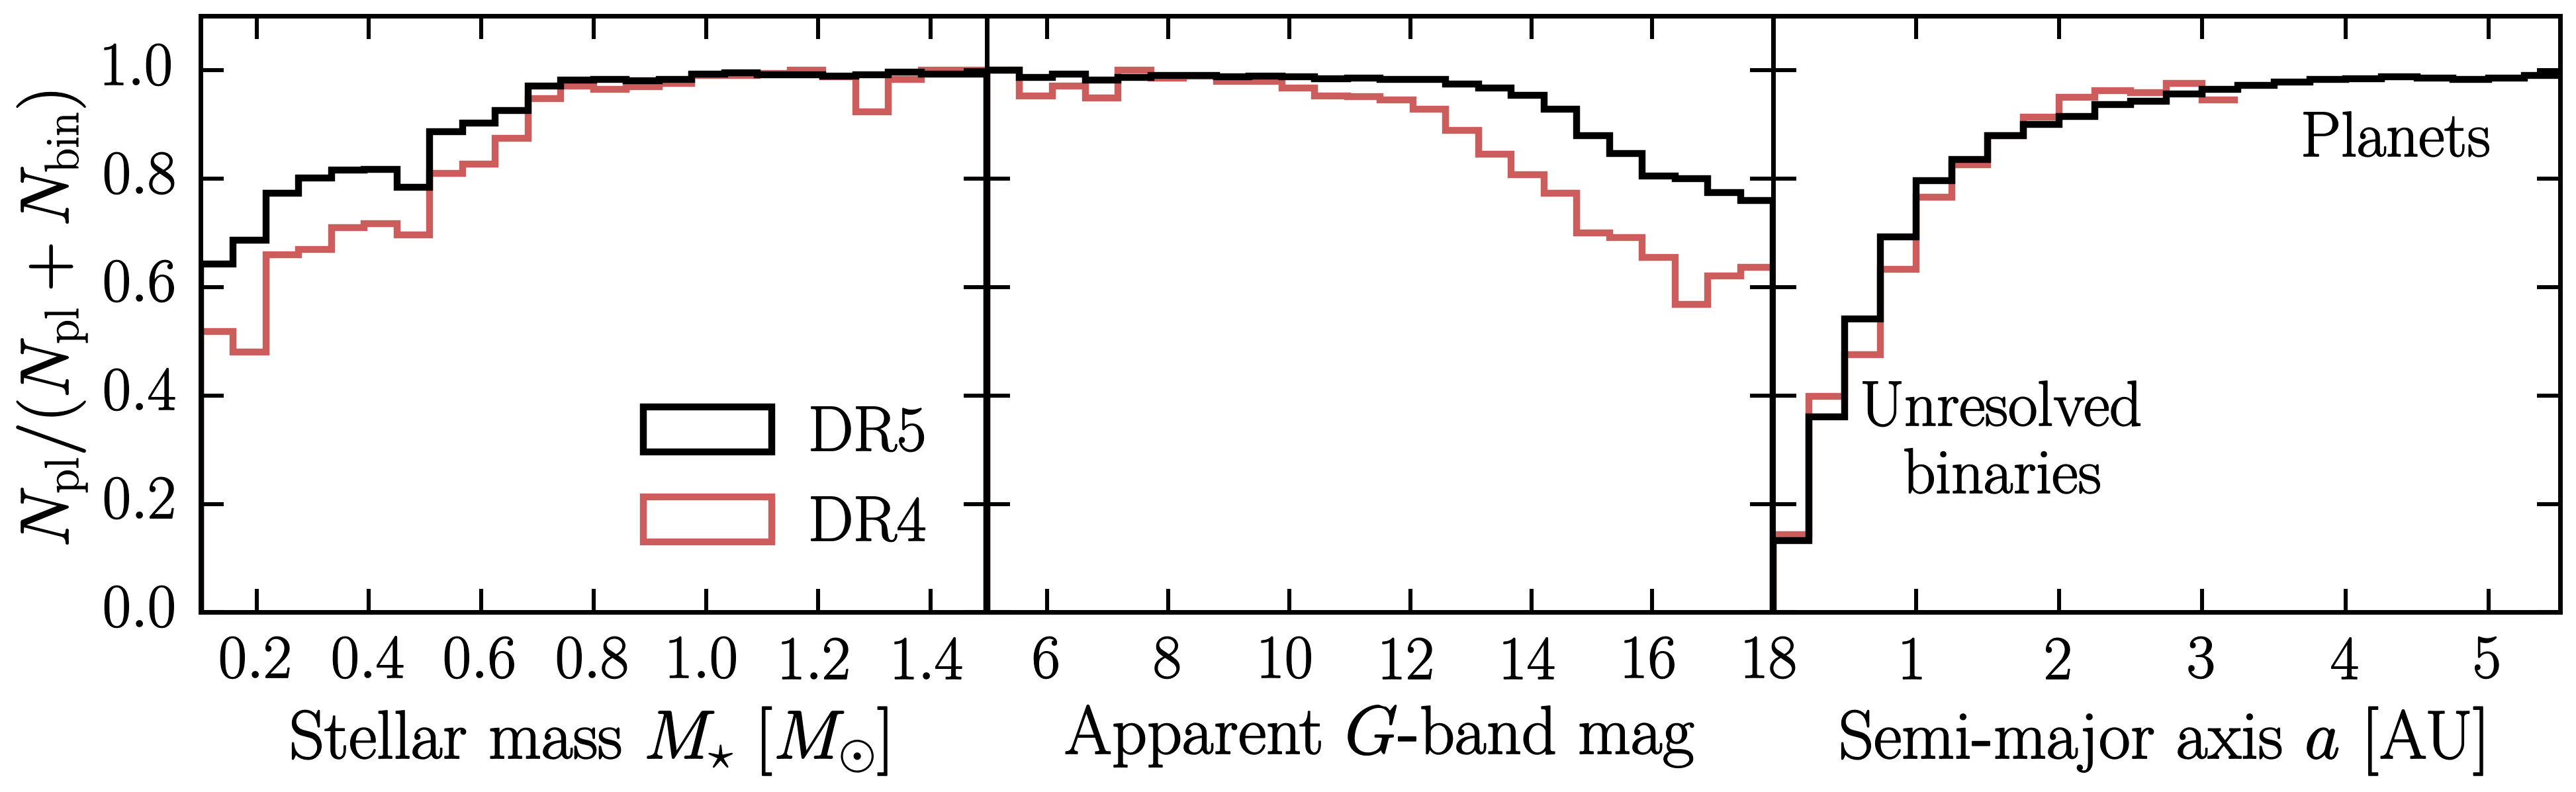

In [18]:
# make plot; rate vs. stellar mass
fig, ax = plt.subplots(1, 3, figsize=(20.0*0.92, 5.3*0.85), sharey=True, dpi=250, facecolor='white')
ax[0].hist(stellar_mass_hist, bins=stellar_mass_edges, weights=DR5_stellar_mass_ratios, color='k', lw=3, histtype='step', label=r'$\mathrm{DR5}$', zorder=10)
ax[0].hist(stellar_mass_hist, bins=stellar_mass_edges, weights=DR4_stellar_mass_ratios, color='indianred', lw=3, histtype='step', label=r'$\mathrm{DR4}$')
ax[0].set_ylabel(r'$N_\mathrm{pl}/(N_\mathrm{pl} + N_\mathrm{bin})$', labelpad=7, fontsize=30)
ax[0].set_xlabel(r'$\mathrm{Stellar~mass}~M_\star~[M_\odot]$', labelpad=7, fontsize=30)
ax[0].set_xlim([0.1, 1.5])
ax[0].set_ylim([0.0, 1.1])
ax[0].legend(loc='lower right', handletextpad=0.6, frameon=False, fontsize=28)

# rate vs. G-band mag
ax[1].hist(G_mag_hist, bins=G_mag_edges, weights=DR5_G_mag_ratios, color='k', lw=3, histtype='step', label=r'$\mathrm{DR5}$', zorder=10)
ax[1].hist(G_mag_hist, bins=G_mag_edges, weights=DR4_G_mag_ratios, color='indianred', lw=3, histtype='step', label=r'$\mathrm{DR4}$')
ax[1].set_xlabel(r'$\mathrm{Apparent}~G$-$\mathrm{band~mag}$', labelpad=7, fontsize=30)
ax[1].set_xlim([5.0, 18])

# rate vs. semi-major axis
ax[2].hist(semi_a_hist, bins=semi_a_edges, weights=DR5_semi_a_ratios, color='k', lw=3, histtype='step', label=r'$\mathrm{DR5}$', zorder=10)
ax[2].hist(semi_a_hist, bins=semi_a_edges, weights=DR4_semi_a_ratios, color='indianred', lw=3, histtype='step', label=r'$\mathrm{DR4}$')
ax[2].set_xlabel(r'$\mathrm{Semi}$-$\mathrm{major~axis}~a~[\mathrm{AU}]$', labelpad=7, fontsize=30)
ax[2].set_xlim([0.0, 5.5])
ax[2].set_ylim([0.0, 1.1])
ax[2].set_xticks([1.0, 2.0, 3.0, 4.0, 5.0])

# add labels for planet-dominated and binary-dominated regions
ax[2].text(4.37, 0.87, r'$\mathrm{Planets}$', horizontalalignment='center', verticalalignment='center', fontsize=28)
ax[2].text(1.61, 0.31, r'$\mathrm{Unresolved}$' + '\n' + r'$\mathrm{~binaries}$', horizontalalignment='center', verticalalignment='center', fontsize=28)

plt.subplots_adjust(wspace=0.0)
plt.show()

# Make 2D false positive rate plot 

In [19]:
# setup 2D grid
n = 18 # arbitrary
stellar_mass_grid = np.linspace(0.1, 1.5, n)
semi_a_grid = np.linspace(0.0, 5.0, n)
dMstar = stellar_mass_grid[1] - stellar_mass_grid[0]
dsemia = semi_a_grid[1] - semi_a_grid[0]
mesh_semi_as, mesh_stellar_masses = np.meshgrid(semi_a_grid, stellar_mass_grid)

In [20]:
# calculate false positive rates in M_star and a bins
true_positive_rate_mesh = np.zeros(mesh_semi_as.shape)
for i in range(n):
    for j in range(n):
        print('stellar_mass_grid[i]:', stellar_mass_grid[i], '-', stellar_mass_grid[i]+dMstar)
        print('semi_a_grid[j]:', semi_a_grid[j], '-', semi_a_grid[j]+dsemia)
        mask_DR5_stellar_mass = ((stellar_mass_grid[i] < DR5_stellar_masses) & (DR5_stellar_masses < stellar_mass_grid[i]+dMstar))
        mask_DR5_semi_a = ((semi_a_grid[j] < DR5_semi_as) & (DR5_semi_as < semi_a_grid[j]+dsemia))
        mask_bin_stellar_mass = ((stellar_mass_grid[i] < DR5_bin_stellar_masses) & (DR5_bin_stellar_masses < stellar_mass_grid[i]+dMstar))
        mask_bin_semi_a = ((semi_a_grid[j] < DR5_bin_semi_as) & (DR5_bin_semi_as < semi_a_grid[j]+dsemia))
        mask_DR5 = (mask_DR5_stellar_mass & mask_DR5_semi_a)
        mask_bin = (mask_bin_stellar_mass & mask_bin_semi_a)
        print('np.sum(mask_DR5):', np.sum(mask_DR5))
        print('np.sum(mask_bin):', np.sum(mask_bin))
        
        if np.sum(mask_DR5) + np.sum(mask_bin) < 5: # catch the few instances where there aren't enough sources
            true_positive_rate_mesh[i, j] = np.nan
        else:
            true_positive_rate_mesh[i, j] = np.sum(mask_DR5)/(np.sum(mask_bin) + np.sum(mask_DR5))
        print('true_positive_rate_mesh[i, j]:', true_positive_rate_mesh[i, j], '\n')

stellar_mass_grid[i]: 0.1 - 0.1823529411764706
semi_a_grid[j]: 0.0 - 0.29411764705882354
np.sum(mask_DR5): 0
np.sum(mask_bin): 10
true_positive_rate_mesh[i, j]: 0.0 

stellar_mass_grid[i]: 0.1 - 0.1823529411764706
semi_a_grid[j]: 0.29411764705882354 - 0.5882352941176471
np.sum(mask_DR5): 4
np.sum(mask_bin): 7
true_positive_rate_mesh[i, j]: 0.36363636363636365 

stellar_mass_grid[i]: 0.1 - 0.1823529411764706
semi_a_grid[j]: 0.5882352941176471 - 0.8823529411764706
np.sum(mask_DR5): 9
np.sum(mask_bin): 29
true_positive_rate_mesh[i, j]: 0.23684210526315788 

stellar_mass_grid[i]: 0.1 - 0.1823529411764706
semi_a_grid[j]: 0.8823529411764706 - 1.1764705882352942
np.sum(mask_DR5): 32
np.sum(mask_bin): 32
true_positive_rate_mesh[i, j]: 0.5 

stellar_mass_grid[i]: 0.1 - 0.1823529411764706
semi_a_grid[j]: 1.1764705882352942 - 1.4705882352941178
np.sum(mask_DR5): 60
np.sum(mask_bin): 31
true_positive_rate_mesh[i, j]: 0.6593406593406593 

stellar_mass_grid[i]: 0.1 - 0.1823529411764706
semi_a_grid[j

In [21]:
# properties for DR3 candidates with mp < 13 M_Jup (from Stefansson et al. 2025)
DR3_orb_periods = np.array([2.138261464750171, 2.2532511978097194, 1.648186173853525, 0.8158795345653662, 2.9815195071868583,\
                   2.2587268993839835, 1.0978781656399725, 0.8240930869267625, 1.3552361396303902, 1.2238193018480492,\
                   1.111567419575633, 1.6399726214921286, 1.431895961670089, 1.1416837782340863, 1.242984257357974,\
                   1.620807665982204, 0.16700889801505817, 1.7768651608487338, 2.329911019849418, 2.4449007529089664,\
                   2.329911019849418, 1.7056810403832992])
DR3_stellar_masses = np.array([0.27, 0.27, 0.25, 0.701, 1.333, 0.277, 1.042, 0.17, 0.16, 0.45, 0.173, 0.438, 0.473, 0.283,\
                               0.178, np.nan, 0.306, 0.767, 1.045, 1.415, 0.183, 0.138])
DR3_planet_masses = np.array([6.2, 6.8, 5.4, 7.2, 12.9, 4.9, 6.8, 9.6, 6.3, 12.2, 6.3, 10.1, 7.6, 8.5, 11.5, 11.9, 3.1, 4.5, 8.2, 8.2, 10.3947, 12.71])
DR3_semi_as = ((DR3_orb_periods)**(2/3))*((DR3_stellar_masses + DR3_planet_masses/1047.57)**(1/3)) # AU
designations = np.array(['UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'WITHDRAWN', 'UNKNOWN', 'UNKNOWN', 'WITHDRAWN', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', 'BINARY', 'BINARY',\
                         'BINARY', 'BINARY', 'BINARY', 'BINARY', 'EXOPLANET', 'EXOPLANET', 'EXOPLANET', 'EXOPLANET', 'UNKNOWN', 'UNKNOWN'])
soln_types = np.array(['ORBITAL', 'ORBITAL', 'ORBITAL', 'OTSV', 'OTSV', 'ORBITAL', 'OTSV', 'ORBITAL', 'ORBITAL', 'ORBITAL', 'ORBITAL',
                       'ORBITAL', 'ORBITAL', 'ORBITAL', 'ORBITAL', 'ORBITAL', 'OTSV', 'OTSV', 'OTSV', 'OTSV', 'ORBITAL', 'ORBITAL'])

unknown_mask = ((designations == 'UNKNOWN') & (soln_types == 'ORBITAL'))
binary_mask = ((designations == 'BINARY') & (soln_types == 'ORBITAL'))
planet_mask = ((designations == 'EXOPLANET'))

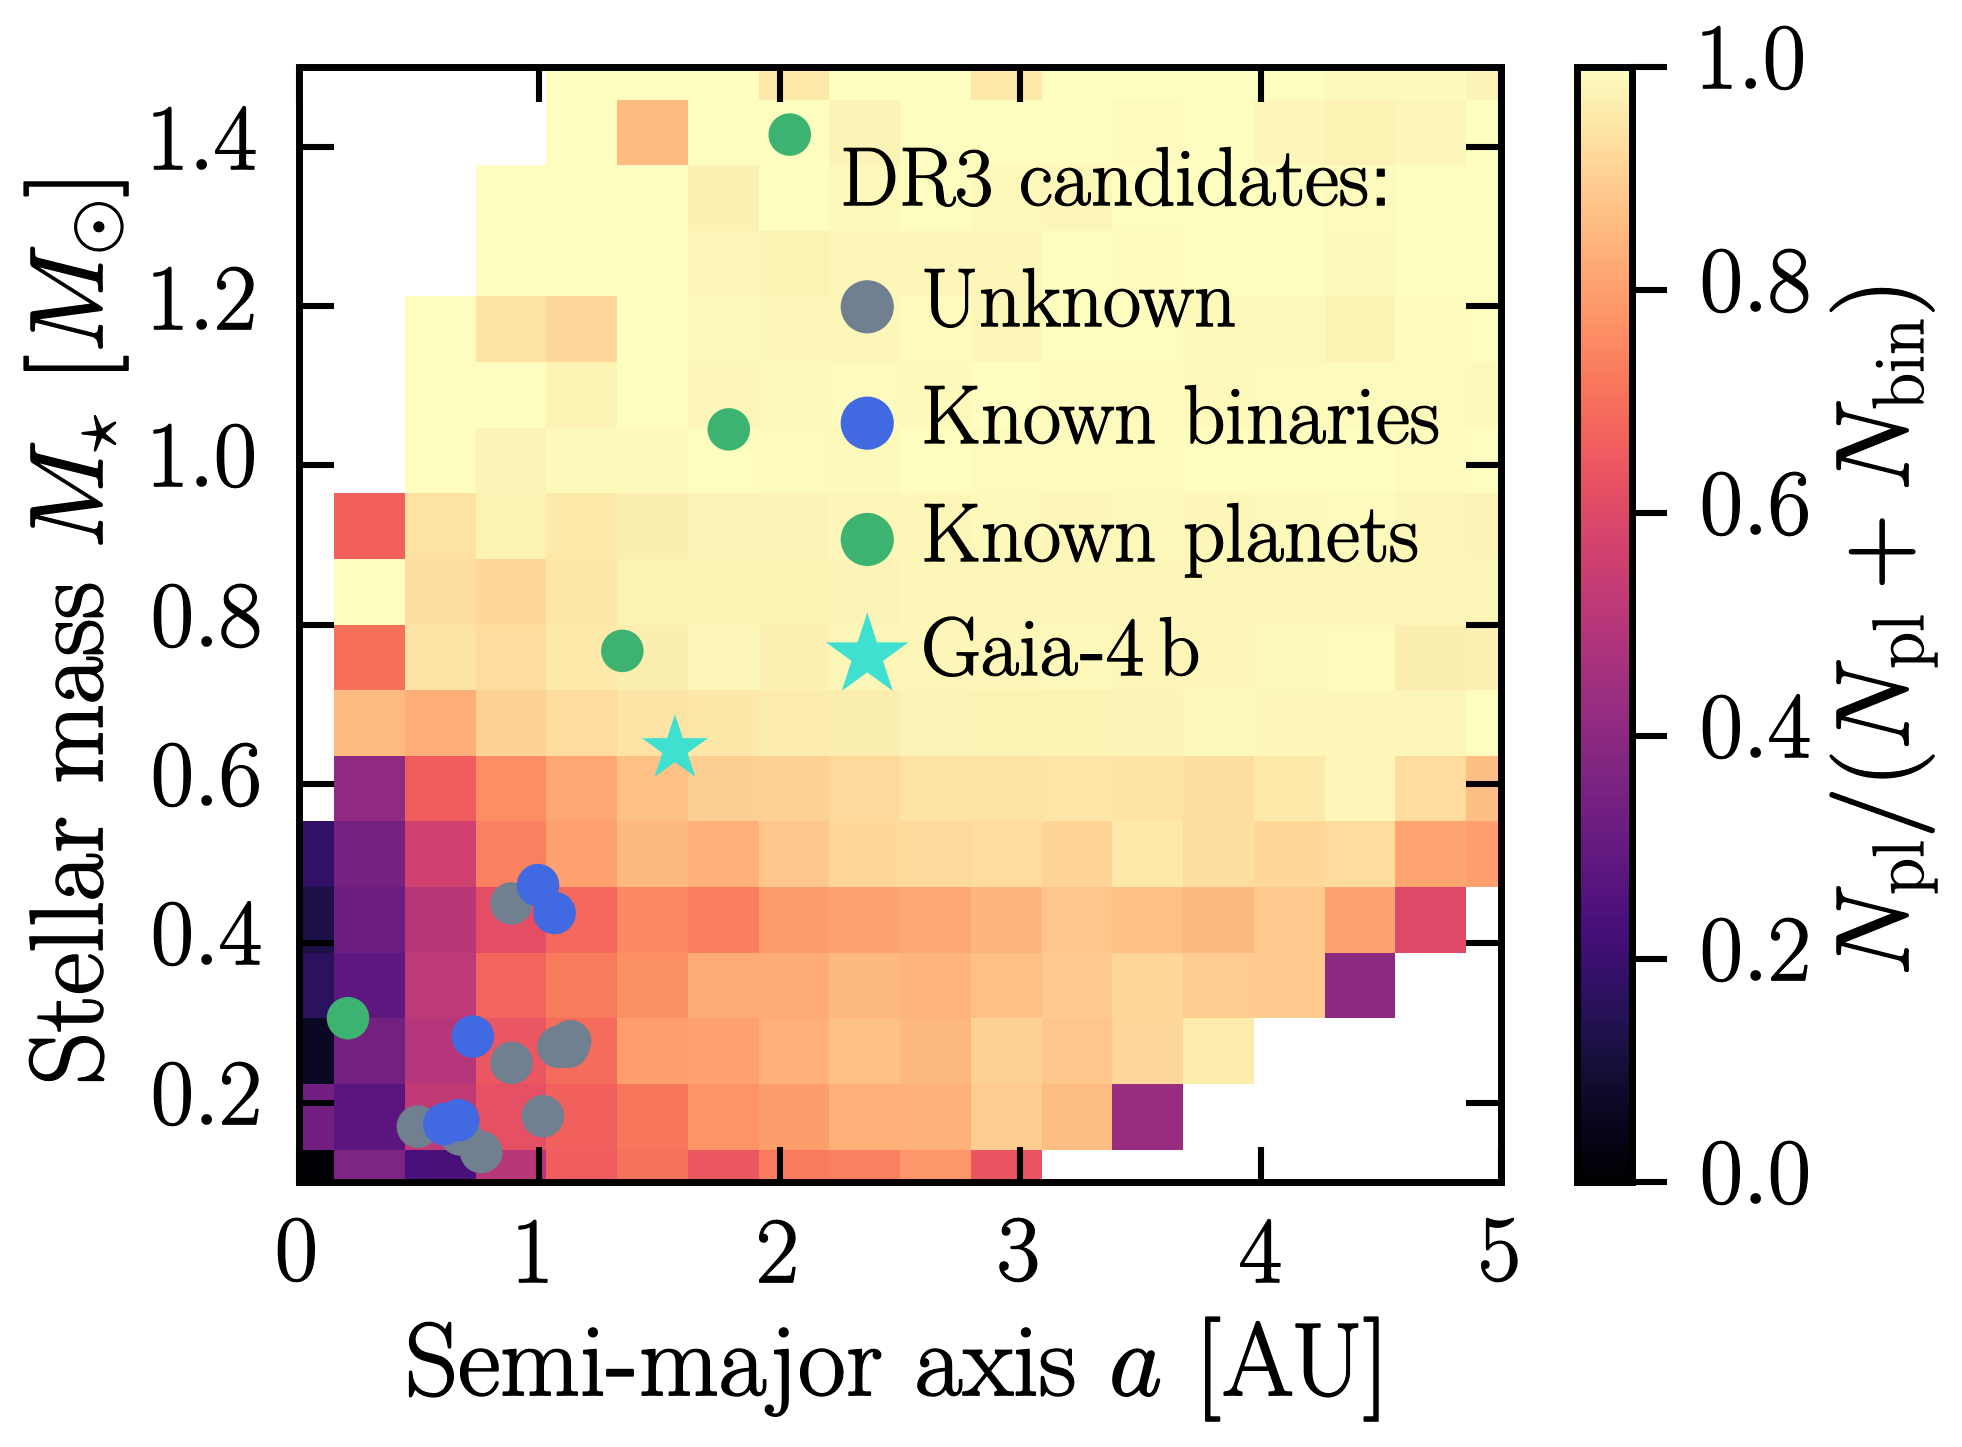

In [22]:
# make plot
fig, axes = plt.subplots(1, 1, figsize=(8.0*0.97, 5.75*0.97), facecolor='white', dpi=250)
axes.set_facecolor('white')
mesh1 = axes.pcolormesh(
    mesh_semi_as, mesh_stellar_masses, true_positive_rate_mesh,
    cmap='magma',
    vmin=0.0, vmax=1.0)
plt.xlim([0.0, 5.0])
plt.ylim([0.1, 1.5])
plt.xlabel(r'$\mathrm{Semi}$-$\mathrm{major~axis}~a~\mathrm{[AU]}$', fontsize=30)
plt.ylabel(r'$\mathrm{Stellar~mass}~M_\star~[M_\odot]$', fontsize=30, labelpad=7)
plt.xticks([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])

# add colorbar
cbar = plt.colorbar(mesh1, ax=axes)
cbar.set_label(r'$N_\mathrm{pl}/(N_\mathrm{pl} + N_\mathrm{bin})$', fontsize=30)
cbar.ax.tick_params(axis='y', which="both", direction='out')

# add DR3 candidates
plt.scatter(DR3_semi_as[unknown_mask], DR3_stellar_masses[unknown_mask], color='slategrey', s=150, edgecolor='none', label=r'$\mathrm{Unknown}$')
plt.scatter(DR3_semi_as[binary_mask], DR3_stellar_masses[binary_mask], color='royalblue', s=150, edgecolor='none', label=r'$\mathrm{Known~binaries}$')
plt.scatter(DR3_semi_as[planet_mask], DR3_stellar_masses[planet_mask], color='mediumseagreen', s=150, edgecolor='none', label=r'$\mathrm{Known~planets}$')

# highlight Gaia-4b
plt.scatter(1.56413415469, 0.644, c='turquoise', s=400, marker='*', edgecolor='none', label=r'$\mathrm{Gaia}$-$\mathrm{4\,b}$')
plt.text(3.41, 1.35, r'$\mathrm{DR3~candidates}$:', horizontalalignment='center', verticalalignment='center', fontsize=24)

plt.legend(loc='upper right', markerscale=1.25, bbox_to_anchor=(1.0, 0.87), scatterpoints=1, handletextpad=-0.32, borderaxespad=0.3, frameon=False, fontsize=24)
plt.show()